# Spam Email Detection using a Machine Learning Approach

Authors:  Mussie Samuel, Department of Computer Science, Southern University and A&M College, Baton Rouge, Louisiana, USA


  Tapan Sarkar, Ph.D, Department of Computer Science, College of Business, Southern University and A&M College, Baton Rouge, Louisiana, USA

Credit and thanks to @kanagalingamsm/Email-Spam-Detection for providing the original source code, which I have modified for use in this project


## Install & Preprocess

### Install necessary libraries

In [ ]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install nltk
!pip install ipython-autotime
!pip install kagglehub --upgrade

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 17.1 s (started: 2025-02-21 17:04:39 +00:00)


### Import libraries & dataset

In [ ]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc

import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import kagglehub

# import dataset
path = kagglehub.dataset_download("venky73/spam-mails-dataset")

print("Path to dataset files:", path)
# path to dataset
df = pd.read_csv('/root/.cache/kagglehub/datasets/venky73/spam-mails-dataset/versions/1/spam_ham_dataset.csv')
df['text'] = df['text'].apply(lambda x: x.replace('\n', ' '))
df

#0 = ham, 1 = spam

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Path to dataset files: /root/.cache/kagglehub/datasets/venky73/spam-mails-dataset/versions/1


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r t...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r ( see ...",0
2,3624,ham,"Subject: neon retreat\r ho ho ho , we ' re aro...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r this deal is to...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r the transport ...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r hpl...,0
5168,2933,ham,Subject: calpine daily gas nomination\r >\r >\...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


time: 1.21 s (started: 2025-02-21 17:04:56 +00:00)


### Preprocess, split dataset

In [ ]:
# init stemmer and corpus list
stemmer = PorterStemmer()
corpus = []

# use english stopwords to filter certain words
stops = set(stopwords.words('english'))

# loop for each row in dataset, convert text to lowercase, remove punc., tokenize, remove stopwords, apply stemming, join processed words, send to corpus
for i in range(len(df)):
  text = df['text'].iloc[i].lower() # full venky dataset already lowercase
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = [stemmer.stem(word) for word in text.split() if word not in stops]
  text = ' '.join(text)
  corpus.append(text)

# convert corpus into BoW
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(corpus).toarray() # input data
y = df.label_num # spam (0) or ham (1)

# 80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

time: 34 s (started: 2025-02-21 17:04:58 +00:00)


## Train using following algorithms

### Mulinomial Naive Bayes

Accuracy = 97.1014%
              precision    recall  f1-score   support

           0     0.9759    0.9838    0.9798       741
           1     0.9583    0.9388    0.9485       294

    accuracy                         0.9710      1035
   macro avg     0.9671    0.9613    0.9641      1035
weighted avg     0.9709    0.9710    0.9709      1035



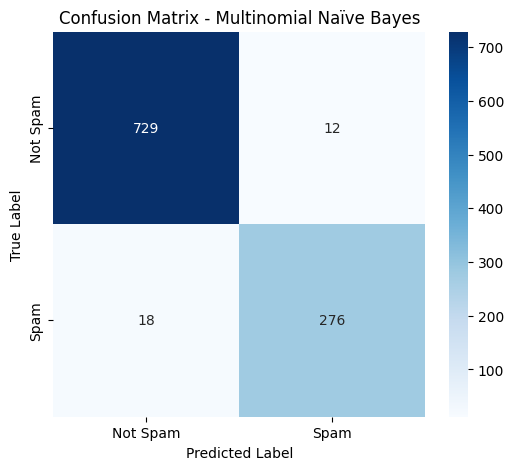

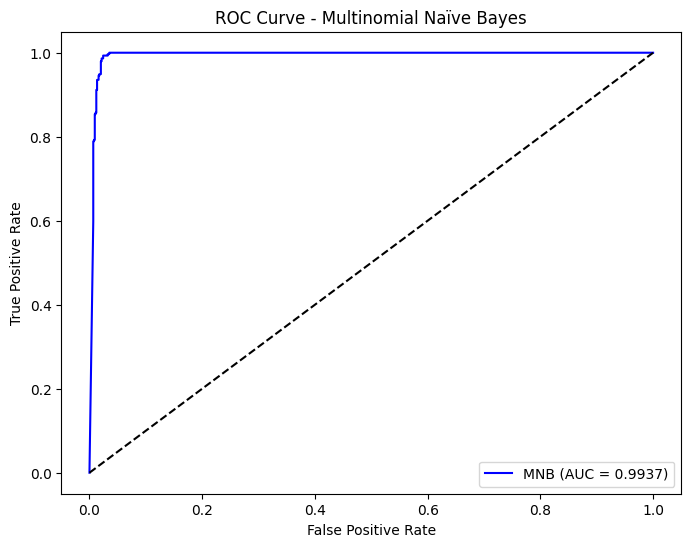

AUC Score: 0.9937
time: 4.7 s (started: 2025-02-21 16:38:01 +00:00)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import MultinomialNB

# Train the model
clf = MultinomialNB()
clf.fit(x_train, y_train)

# Predict labels for test set
y_pred = clf.predict(x_test)

# Compute and print statistics
accuracy = clf.score(x_test, y_test) * 100
report = classification_report(y_test, y_pred, digits=4)
print(f"Accuracy = {accuracy:.4f}%")
print(report)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Multinomial Naïve Bayes")
plt.show()

# Compute ROC Curve and AUC Score
y_probs = clf.predict_proba(x_test)[:, 1]  # Get probability for spam (class 1)
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'MNB (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Multinomial Naïve Bayes")
plt.legend()
plt.show()

print(f"AUC Score: {auc_score:.4f}")

### K-Nearest Neighbors

Accuracy = 82.3188%
              precision    recall  f1-score   support

           0     0.9764    0.7738    0.8633       747
           1     0.6185    0.9514    0.7497       288

    accuracy                         0.8232      1035
   macro avg     0.7974    0.8626    0.8065      1035
weighted avg     0.8768    0.8232    0.8317      1035



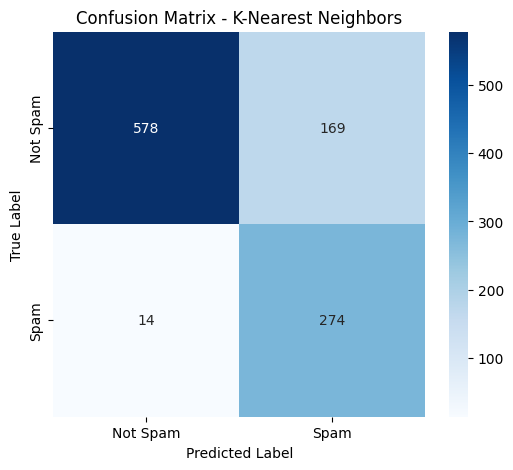

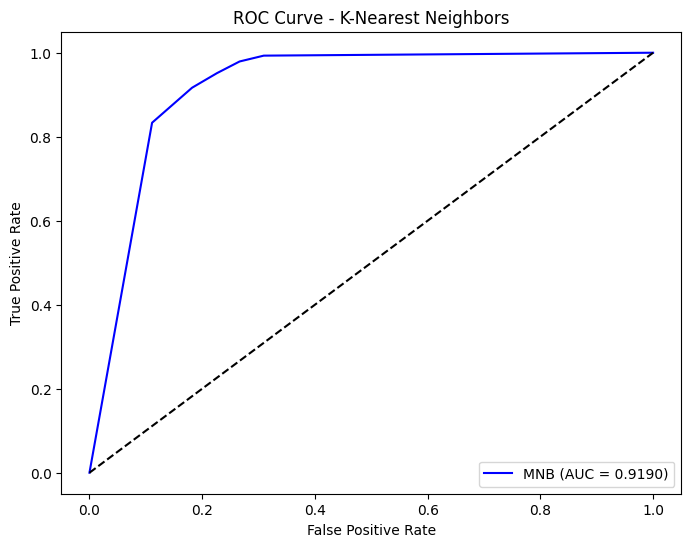

AUC Score: 0.9190
time: 1min 1s (started: 2025-02-21 16:43:34 +00:00)


In [ ]:
# use KNN with 5 neighbors
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train, y_train)

# predict labels for test set
y_pred = clf.predict(x_test)

# calculate and print metrics
accuracy = clf.score(x_test, y_test) * 100
report = classification_report(y_test, y_pred, digits=4)
print(f"Accuracy = {accuracy:.4f}%")
print(report)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.show()

# calculate ROC curve and AUC
y_probs = clf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)

# plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'MNB (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # needed for random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - K-Nearest Neighbors")
plt.legend()
plt.show()

print(f"AUC Score: {auc_score:.4f}")

### Logistic Regression

Accuracy = 97.3913%
              precision    recall  f1-score   support

           0     0.9877    0.9757    0.9817       741
           1     0.9406    0.9694    0.9548       294

    accuracy                         0.9739      1035
   macro avg     0.9641    0.9725    0.9682      1035
weighted avg     0.9743    0.9739    0.9740      1035



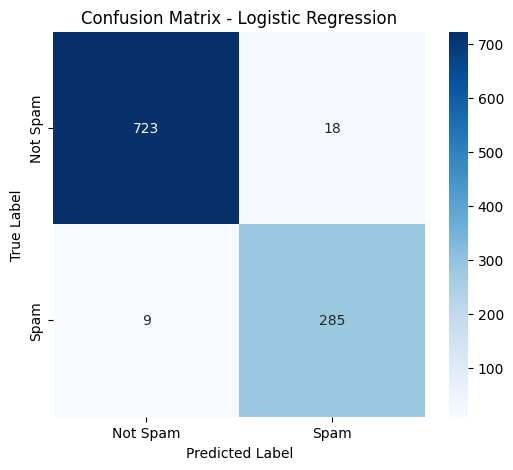

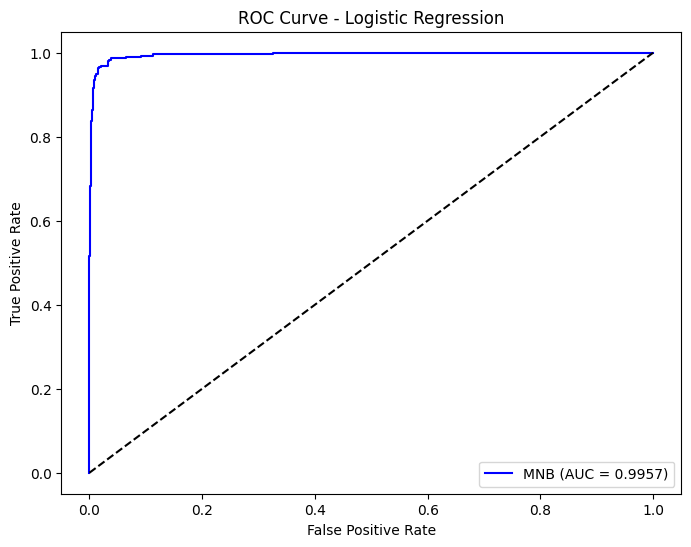

AUC Score: 0.9957
time: 12.8 s (started: 2025-02-21 17:05:32 +00:00)


In [ ]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

# predict labels for test set
y_pred = clf.predict(x_test)

# create and print statistics
accuracy = clf.score(x_test, y_test) * 100
report = classification_report(y_test, y_pred, digits=4)
print(f"Accuracy = {accuracy:.4f}%")
print(report)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# compute ROC Curve and AUC Score
y_probs = clf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)

# plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'MNB (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

print(f"AUC Score: {auc_score:.4f}")

## Predicting using external data

### With external dataset

Path to dataset files: /root/.cache/kagglehub/datasets/jackksoncsie/spam-email-dataset/versions/1


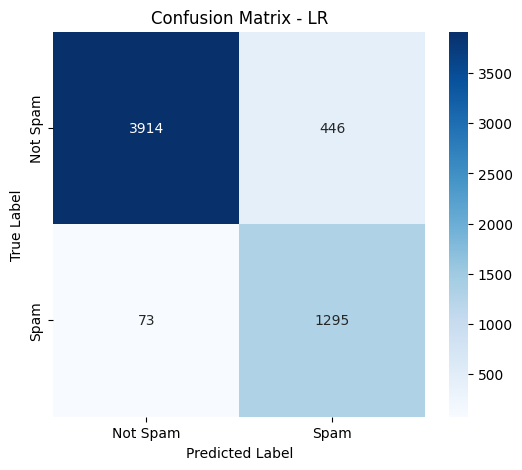

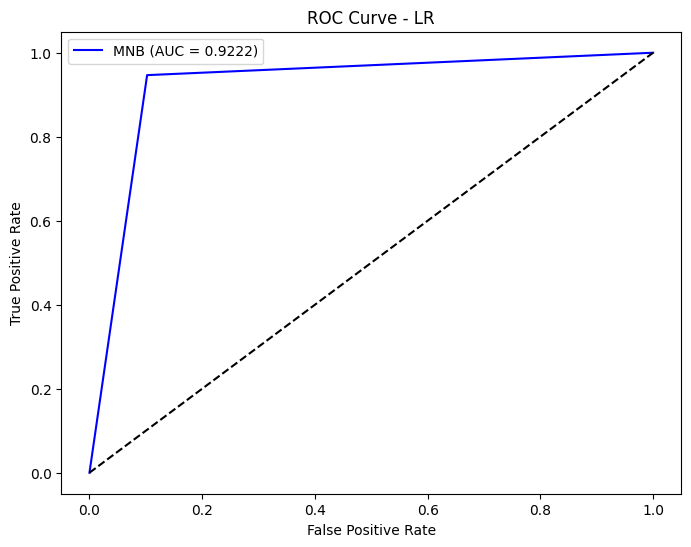

AUC Score: 0.9222
Accuracy: 90.9392%
              precision    recall  f1-score   support

           0     0.9817    0.8977    0.9378      4360
           1     0.7438    0.9466    0.8331      1368

    accuracy                         0.9094      5728
   macro avg     0.8628    0.9222    0.8854      5728
weighted avg     0.9249    0.9094    0.9128      5728

time: 19.5 s (started: 2025-02-21 17:05:45 +00:00)


In [ ]:
# function for preprocessing
def preprocess_email(text):
    stemmer = PorterStemmer()
    stops = set(stopwords.words('english'))
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [stemmer.stem(word) for word in text.split() if word not in stops]
    return ' '.join(text)

# import dataset
path = kagglehub.dataset_download("jackksoncsie/spam-email-dataset")
print("Path to dataset files:", path)
df = pd.read_csv('/root/.cache/kagglehub/datasets/jackksoncsie/spam-email-dataset/versions/1/emails.csv')
df['text'] = df['text'].apply(lambda x: x.replace('\n', ' '))
df

# use spam section of csv as class
true_labels = df['spam']
new_data = df['text']

# preprocess dataset and predict
processed_data = [preprocess_email(email) for email in new_data]
vectorized_data = vectorizer.transform(processed_data).toarray()
predictions = clf.predict(vectorized_data)

# calculate accuracy
correct_count = sum(pred == true for pred, true in zip(predictions, true_labels))
total_count = len(true_labels)
accuracy = (correct_count / total_count) * 100

# Compute Confusion Matrix
cm = confusion_matrix(true_labels, predictions)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - LR")
plt.show()

# compute ROC Curve and AUC Score
y_probs = clf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(true_labels, predictions)
auc_score = auc(fpr, tpr)

# plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'MNB (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LR")
plt.legend()
plt.show()

print(f"AUC Score: {auc_score:.4f}")

# print metrics
print(f"Accuracy: {accuracy:.4f}%")
print(classification_report(true_labels, predictions, digits=4))


### With singular email

In [ ]:
subject_text = input()
subject_text

In [ ]:
# function for preprocessing
def preprocess_email(text):
    stemmer = PorterStemmer()
    stops = set(stopwords.words('english'))
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [stemmer.stem(word) for word in text.split() if word not in stops]
    return ' '.join(text)

processed_email = preprocess_email(subject_text)
new_email_vectorized = vectorizer.transform([processed_email]).toarray()
prediction = clf.predict(new_email_vectorized)


if prediction[0] == 1:
    print("This email is classified as SPAM")
else:
    print("This email is classified as HAM")